# Date - 17/10/2023

# Team Id -  716

# Project title - Public health awareness campaign analysis

# Import Packages

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Loading Dataset

In [285]:
dataset = pd.read_csv("C:\\Users\\VIJAY\\OneDrive\\Documents\\Nmdataset.csv")

# Data Exploration

In [286]:
dataset

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [287]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [288]:
dataset.describe

<bound method NDFrame.describe of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment

In [289]:
data = pd.DataFrame(dataset)

In [290]:
data.shape

(1259, 27)

# Data Cleaning

In [291]:
data.drop(["self_employed","family_history","no_employees","remote_work","benefits","care_options","seek_help","anonymity","leave","supervisor","comments"],axis=1,inplace=True)

In [292]:
data

,Timestamp,Age,Gender,Country,state,treatment,work_interfere,tech_company,wellness_program,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,Yes,Often,Yes,No,No,No,Some of them,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,Rarely,No,Don't know,Maybe,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,Rarely,Yes,No,No,No,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Often,Yes,No,Yes,Yes,Some of them,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,Never,Yes,Don't know,No,No,Some of them,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,Yes,NaN,Yes,No,No,No,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,Yes,Often,Yes,No,No,No,Some of them,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,Yes,Sometimes,Yes,No,Yes,Yes,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,NaN,Yes,No,Yes,No,No,No,No,No,No


In [293]:
data["Gender"].replace("Female","F",inplace=True)

In [294]:
data["Gender"].replace("Male","M",inplace=True)

In [295]:
data["Gender"].replace("male","M",inplace=True)

In [296]:
data["Gender"].replace("f","F",inplace=True)

In [297]:
data["Gender"].replace("female","F",inplace=True)

In [298]:
data["Gender"].replace("m","M",inplace=True)

# Handling Missing data

In [299]:
data.fillna("Na",inplace=True)

In [300]:
data

,Timestamp,Age,Gender,Country,state,treatment,work_interfere,tech_company,wellness_program,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,F,United States,IL,Yes,Often,Yes,No,No,No,Some of them,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,Rarely,No,Don't know,Maybe,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,M,Canada,Na,No,Rarely,Yes,No,No,No,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,M,United Kingdom,Na,Yes,Often,Yes,No,Yes,Yes,Some of them,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,M,United States,TX,No,Never,Yes,Don't know,No,No,Some of them,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,M,United Kingdom,Na,Yes,Na,Yes,No,No,No,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,M,United States,IL,Yes,Often,Yes,No,No,No,Some of them,No,No,Yes,No
1256,2015-11-07 12:36:58,34,M,United States,CA,Yes,Sometimes,Yes,No,Yes,Yes,No,No,No,No,No
1257,2015-11-30 21:25:06,46,F,United States,NC,No,Na,Yes,No,Yes,No,No,No,No,No,No


In [301]:
data.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
treatment                    0
work_interfere               0
tech_company                 0
wellness_program             0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Preprocessing 

In [302]:
encoder=LabelEncoder()
data["Gender"]=encoder.fit_transform(data["Gender"])
data["treatment"]=encoder.fit_transform(data["treatment"])
data["work_interfere"]=encoder.fit_transform(data["work_interfere"])
data["coworkers"]=encoder.fit_transform(data["coworkers"])
data["tech_company"]=encoder.fit_transform(data["tech_company"])
data["wellness_program"]=encoder.fit_transform(data["wellness_program"])
data["mental_health_consequence"]=encoder.fit_transform(data["mental_health_consequence"])
data["phys_health_consequence"]=encoder.fit_transform(data["phys_health_consequence"])
data["mental_health_interview"]=encoder.fit_transform(data["mental_health_interview"])
data["phys_health_interview"]=encoder.fit_transform(data["phys_health_interview"])
data["mental_vs_physical"]=encoder.fit_transform(data["mental_vs_physical"])
data["obs_consequence"]=encoder.fit_transform(data["obs_consequence"])


In [303]:
data["Country"]=encoder.fit_transform(data["Country"])
data["state"]=encoder.fit_transform(data["state"])

x=data[:]
x

,Timestamp,Age,Gender,Country,state,treatment,work_interfere,tech_company,wellness_program,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,8,45,10,1,2,1,1,1,1,1,1,0,2,0
1,2014-08-27 11:29:37,44,15,45,11,0,3,0,0,0,1,0,1,1,0,0
2,2014-08-27 11:29:44,32,15,7,29,0,3,1,1,1,1,2,2,2,1,0
3,2014-08-27 11:29:46,31,15,44,29,1,2,1,1,2,2,1,0,0,1,1
4,2014-08-27 11:30:22,31,15,45,38,0,1,1,0,1,1,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,15,44,29,1,0,1,1,1,1,1,1,1,0,0
1255,2015-09-26 01:07:35,32,15,45,10,1,2,1,1,1,1,1,1,1,2,0
1256,2015-11-07 12:36:58,34,15,45,2,1,4,1,1,2,2,0,1,1,1,0
1257,2015-11-30 21:25:06,46,8,45,22,0,0,1,1,2,1,0,1,1,1,0


In [304]:
x1=x.loc[:,"Age":]

In [305]:
x1

,Age,Gender,Country,state,treatment,work_interfere,tech_company,wellness_program,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,8,45,10,1,2,1,1,1,1,1,1,0,2,0
1,44,15,45,11,0,3,0,0,0,1,0,1,1,0,0
2,32,15,7,29,0,3,1,1,1,1,2,2,2,1,0
3,31,15,44,29,1,2,1,1,2,2,1,0,0,1,1
4,31,15,45,38,0,1,1,0,1,1,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,15,44,29,1,0,1,1,1,1,1,1,1,0,0
1255,32,15,45,10,1,2,1,1,1,1,1,1,1,2,0
1256,34,15,45,2,1,4,1,1,2,2,0,1,1,1,0
1257,46,8,45,22,0,0,1,1,2,1,0,1,1,1,0


In [306]:
for col in x1:
      scale = MinMaxScaler()
      x1[col]=scale.fit_transform(x1[[col]])

# Visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Country'}>,
        <AxesSubplot:title={'center':'state'}>],
       [<AxesSubplot:title={'center':'treatment'}>,
        <AxesSubplot:title={'center':'work_interfere'}>,
        <AxesSubplot:title={'center':'tech_company'}>,
        <AxesSubplot:title={'center':'wellness_program'}>],
       [<AxesSubplot:title={'center':'mental_health_consequence'}>,
        <AxesSubplot:title={'center':'phys_health_consequence'}>,
        <AxesSubplot:title={'center':'coworkers'}>,
        <AxesSubplot:title={'center':'mental_health_interview'}>],
       [<AxesSubplot:title={'center':'phys_health_interview'}>,
        <AxesSubplot:title={'center':'mental_vs_physical'}>,
        <AxesSubplot:title={'center':'obs_consequence'}>, <AxesSubplot:>]],
      dtype=object)

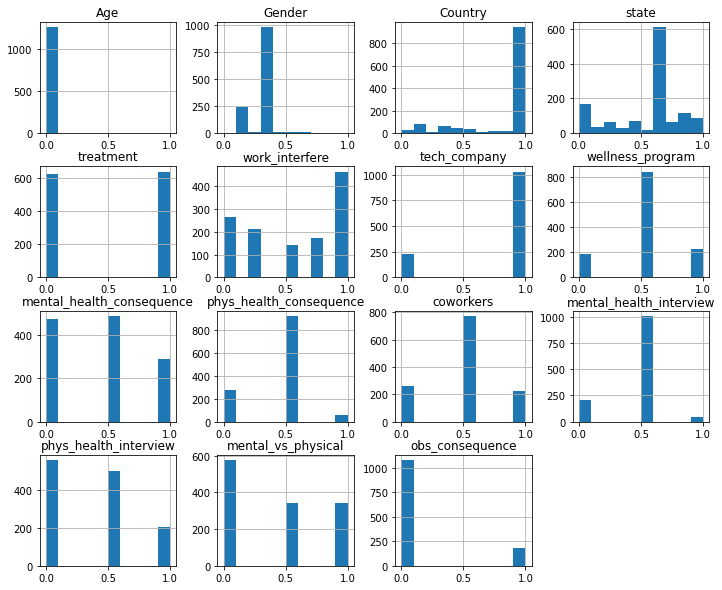

In [307]:
x1.hist(figsize=(12,10))

<AxesSubplot:xlabel='mental_vs_physical', ylabel='Count'>

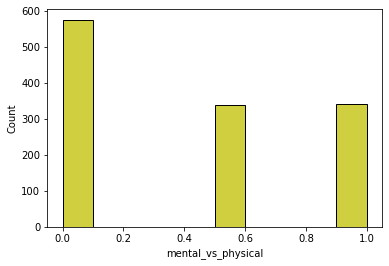

In [308]:
sns.histplot(x1, x='mental_vs_physical', bins=10, color='y')

# Visualising Correlation

In [309]:
x1.corr()

,Age,Gender,Country,state,treatment,work_interfere,tech_company,wellness_program,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,-0.086980,0.019496,0.009760,0.027860,-0.005087,0.013259,-0.001598,0.042128,0.067676,-0.044207,0.074521,0.010989,0.006256,0.068148
Gender,-0.086980,1.000000,-0.051037,0.035690,-0.139121,-0.089863,0.015613,-0.009232,-0.012692,0.006966,0.076664,-0.032557,-0.014953,0.008837,-0.071377
Country,0.019496,-0.051037,1.000000,-0.183642,0.077681,0.029234,-0.041091,0.021439,-0.045102,-0.016538,-0.030811,0.052658,-0.016293,-0.011894,-0.070225
state,0.009760,0.035690,-0.183642,1.000000,-0.070463,-0.010131,-0.024136,0.006128,0.067548,-0.031338,0.006790,-0.030128,0.012415,0.019578,0.024035
treatment,0.027860,-0.139121,0.077681,-0.070463,1.000000,0.614879,-0.031525,0.094713,0.030221,-0.008933,0.068433,0.098413,0.051859,0.062642,0.156972
work_interfere,-0.005087,-0.089863,0.029234,-0.010131,0.614879,1.000000,0.005897,0.093857,0.060506,-0.020522,0.004070,0.098978,-0.017172,0.047200,0.134160
tech_company,0.013259,0.015613,-0.041091,-0.024136,-0.031525,0.005897,1.000000,-0.116931,0.001336,0.066134,0.075383,-0.041117,-0.032186,0.029191,-0.062347
wellness_program,-0.001598,-0.009232,0.021439,0.006128,0.094713,0.093857,-0.116931,1.000000,0.055871,-0.008793,-0.006377,0.052755,-0.010393,0.123616,0.101773
mental_health_consequence,0.042128,-0.012692,-0.045102,0.067548,0.030221,0.060506,0.001336,0.055871,1.000000,0.133603,-0.153773,0.058233,-0.011678,0.066697,0.131924
phys_health_consequence,0.067676,0.006966,-0.016538,-0.031338,-0.008933,-0.020522,0.066134,-0.008793,0.133603,1.000000,0.092390,-0.009345,0.074936,0.113011,-0.027793


<AxesSubplot:>

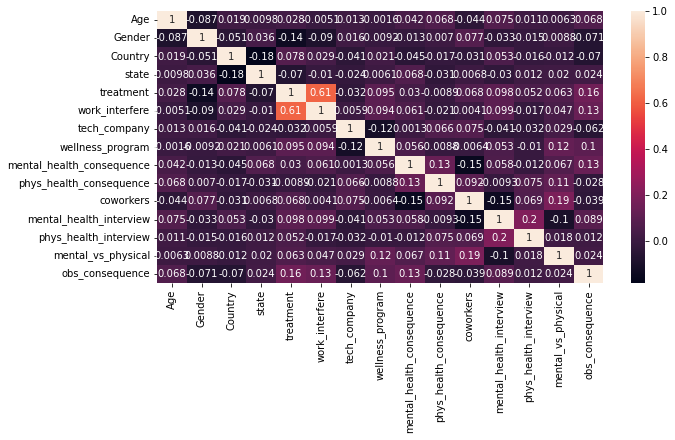

In [310]:
plt.figure(figsize=(10,5))
sns.heatmap(x1.corr(), annot=True)